##### PAIR PROGRAMMING - REGRESIÓN LINEAL 3 - COVARIANZA Y CORRELACIÓN

In [1]:
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista
import ast

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


##### RESPUESTA:

- La principal diferencia entre la covarianza y la correlación, es que la covarianza muestra si ambas variables van en la misma dirección (puede ser positiva o negativa), mientras que  la correlación, además, nos informa de la intensidad de la relación entre variables. 

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [3]:
df = pd.read_csv('../datos/pokePd1.csv', index_col = 0)

In [4]:
df.drop(['Type'], axis = 1, inplace = True)

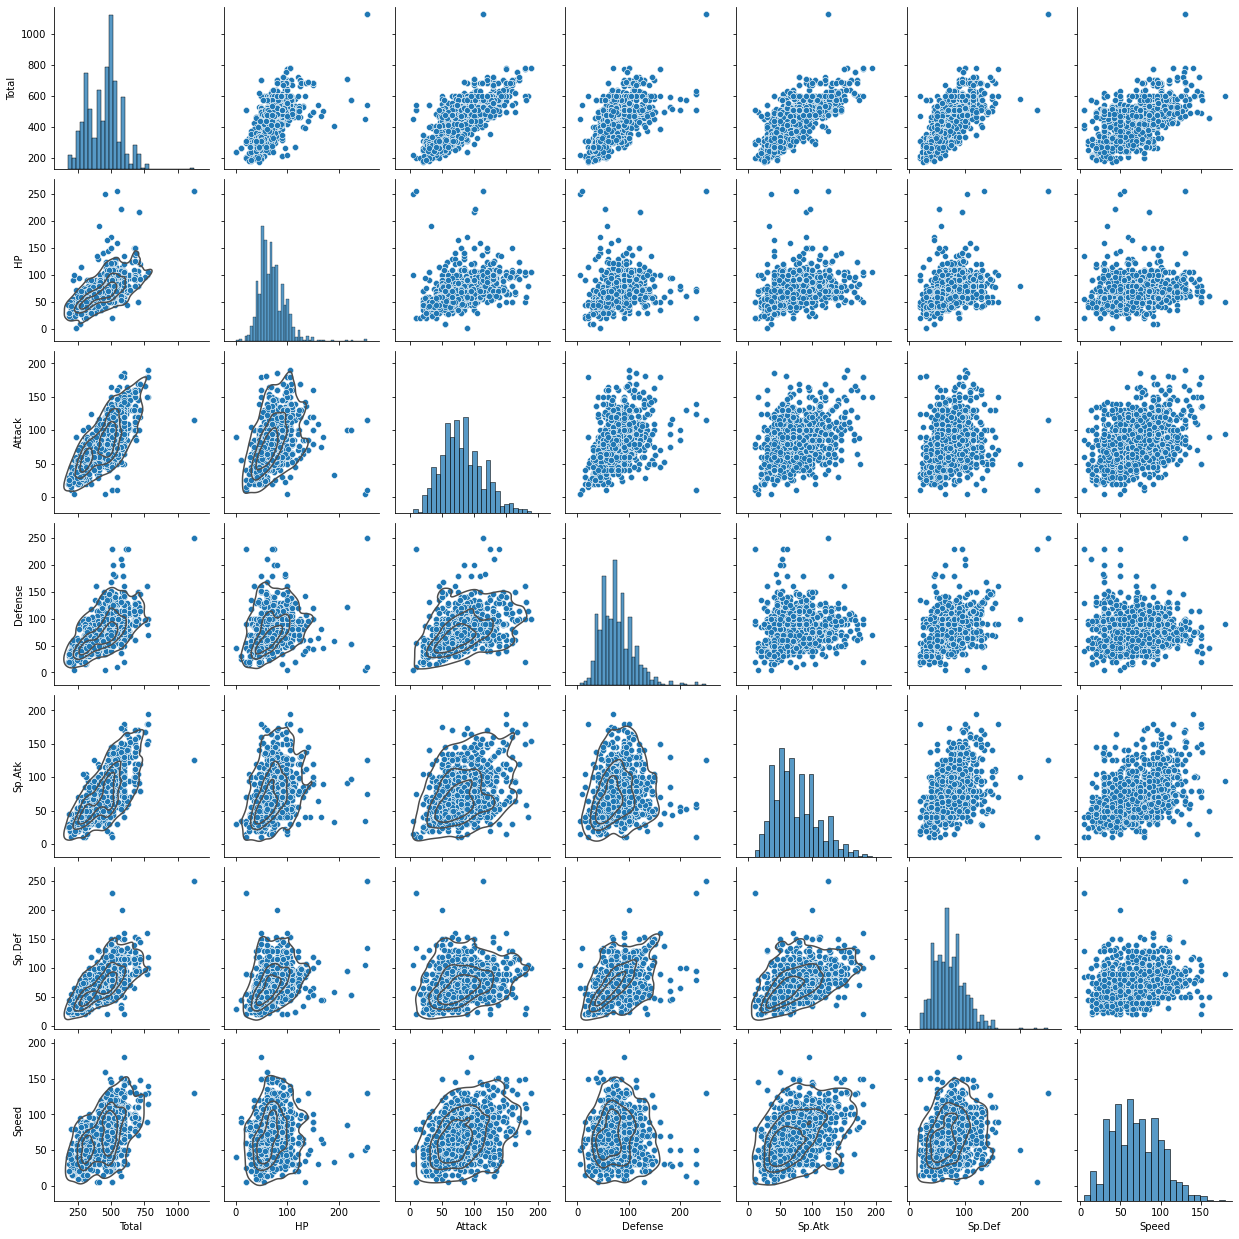

In [18]:
#Obtenemos el pairplot como apoyo visual para ver la relación entre todas las variables

g = sns.pairplot(df)
g.map_lower(sns.kdeplot, levels=4, color='.3');

In [ ]:
#Analíticamente
#Primero calculamos la covarianza, que nos indica la dirección de la relación y vemos que son todas positivas: cuando aumenta el valor de una, lo hace el de la otra

df.cov() 

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
Total,15002.384305,2132.352898,2953.807731,2449.782264,2957.767411,2470.946959,2037.727041
HP,2132.352898,687.804797,394.294103,258.257486,338.668608,290.919519,162.408385
Attack,2953.807731,394.294103,1070.378873,460.694301,407.383369,240.154452,380.902633
Defense,2449.782264,258.257486,460.694301,1017.815815,227.333446,490.603365,-4.922149
Sp.Atk,2957.767411,338.668608,407.383369,227.333446,1091.372790,467.767052,425.242147
Sp.Def,2470.946959,290.919519,240.154452,490.603365,467.767052,794.108520,187.394052
Speed,2037.727041,162.408385,380.902633,-4.922149,425.242147,187.394052,886.701973


In [ ]:
#Calculamos la correlación de Pearson

df.corr() 

#Un ejemplo sería la que se establece entre el ataque especial y el total (muy alta, porque pasa de 0.7)
#Asimismo, una relación alta podría considerarse aquellas entre 0.5 - 0.7 : la correlación entre la defensa y la defensa especial es de 0.54

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
Total,1.000000,0.663814,0.737112,0.626921,0.730966,0.715885,0.558698
HP,0.663814,1.000000,0.459535,0.308664,0.390891,0.393641,0.207963
Attack,0.737112,0.459535,1.000000,0.441377,0.376919,0.260485,0.390982
Defense,0.626921,0.308664,0.441377,1.000000,0.215696,0.545703,-0.005181
Sp.Atk,0.730966,0.390891,0.376919,0.215696,1.000000,0.502462,0.432276
Sp.Def,0.715885,0.393641,0.260485,0.545703,0.502462,1.000000,0.223320
Speed,0.558698,0.207963,0.390982,-0.005181,0.432276,0.223320,1.000000


3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


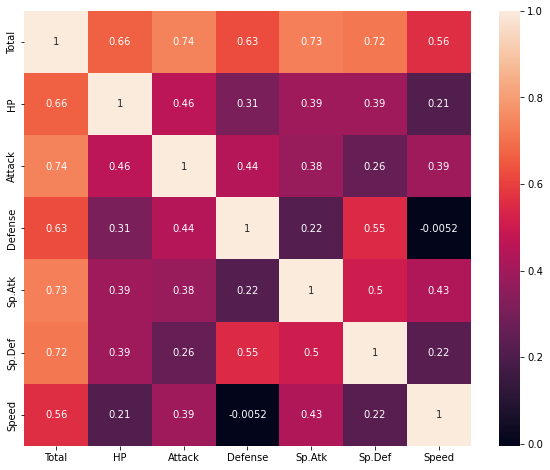

In [20]:
sns.heatmap(df.corr(),
             cmap = 'rocket',
             annot = True);

In [ ]:
# Creamos un df todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(),dtype = np.bool_))

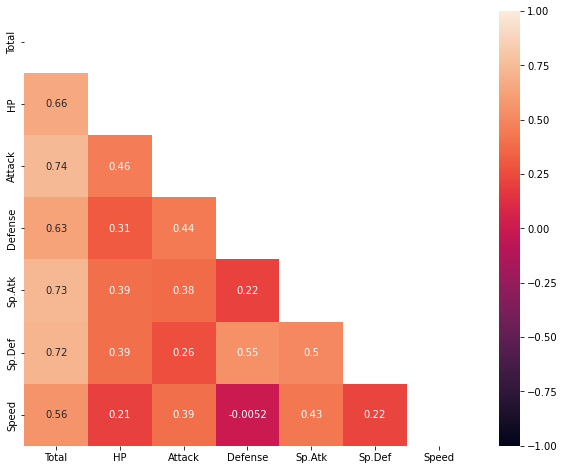

In [ ]:
sns.heatmap(df.corr(),
             cmap = 'rocket',
             annot = True,
             mask = mask,
             vmin = -1,
             vmax= 1);

  ##### COMENTARIO
  
- Vemos que el ataque especial, el ataque y la defensa especial tienen una correlación muy alta con el total de puntos con el pokémon.
- También percibimos una corr alta entre la defensa y el total de puntos, que sería de 0.63, y entre la defensa y la defensa especial, que es de 0.54.
- Por ejemplo, vemos que apenas hay correlación entre la defensa y la velocidad, al ser practicamente el valor cercano a 0.

4. Guardad la gráfica del heatmap.

In [ ]:
plt.savefig('mapa_calor_pokemon.png') 

<Figure size 720x576 with 0 Axes>